# Analysis of NTK Correction Term Scaling Laws

We analyze how the spectral radius of the NTK correction term scales with respect to:
- Network depth (L)
- Network width (M) 
- Input dimension (D)
- Number of samples (N)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import linregress

In [ ]:
PATH_TO_DATA = "/home/janis/STG3A/deeperorwider/experiments/data/large_ntk_corrections"
files = os.listdir(PATH_TO_DATA)
data = []

for f in files:
    if f.startswith("ntk_correction_"):
        d = np.load(os.path.join(PATH_TO_DATA, f), allow_pickle=True).item()
        data.append(d)

## Scaling Analysis by Configuration

In [ ]:
def plot_config_scaling(data, vary_param, fixed_params):
    # Get unique values for each fixed parameter
    unique_values = {p: sorted(list(set(d[p] for d in data))) for p in fixed_params}
    
    # Group data by fixed parameter combinations
    groups = {}
    for d in data:
        key = tuple(d[p] for p in fixed_params)
        if key not in groups:
            groups[key] = []
        groups[key].append((d[vary_param], d['mean_spectral_radius'], d['std_spectral_radius']))

    # Sort groups by number of points
    sorted_groups = sorted(groups.items(), key=lambda x: len(x[1]), reverse=True)

    # Create figure with subplots for each configuration
    n_configs = len(groups)
    fig, axes = plt.subplots(n_configs, 1, figsize=(10, 4*n_configs))
    
    for idx, (config, values) in enumerate(sorted_groups[::5]):
        ax = axes[idx]
        sorted_values = sorted(values, key=lambda x: x[0])
        x = [v[0] for v in sorted_values]
        y = [v[1] for v in sorted_values]
        yerr = [v[2] for v in sorted_values]
        
        ax.errorbar(x, y, yerr=yerr, fmt='o', capsize=5, markersize=8)
        if len(x) > 1:
            slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
            x_line = np.array(sorted(x))
            ax.plot(x_line, np.exp(intercept) * x_line**slope, '--',
                    label=f'slope={slope:.2f}')
        
        config_str = ", ".join([f"{p}={v}" for p,v in zip(fixed_params, config)])
        ax.set_title(f'Spectral Radius vs {vary_param}\n{config_str}')
        ax.set_xlabel(vary_param)
        ax.set_ylabel('Spectral Radius')
        ax.set_yscale('log')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

Analyzing depth (L) scaling for each configuration...


/tmp/ipykernel_50510/2145547798.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


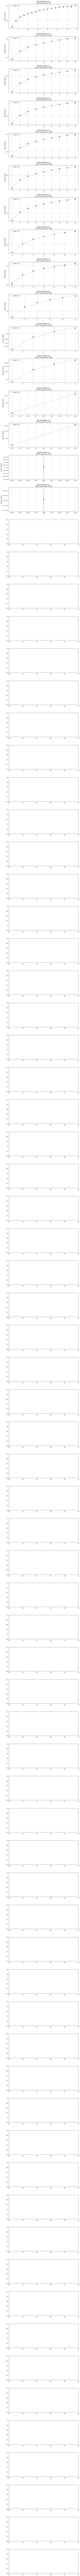

In [ ]:
# Plot scaling with respect to L for each (N,D,M) configuration
print("Analyzing depth (L) scaling for each configuration...")
plot_config_scaling(data, 'L', ['N', 'D_IN', 'M'])

In [ ]:
# Plot scaling with respect to D for each (N,L,M) configuration  
print("Analyzing input dimension (D) scaling for each configuration...")
plot_config_scaling(data, 'D_IN', ['N', 'L', 'M'])

Analyzing input dimension (D) scaling for each configuration...


/tmp/ipykernel_50510/2145547798.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Plotting all points vs L...


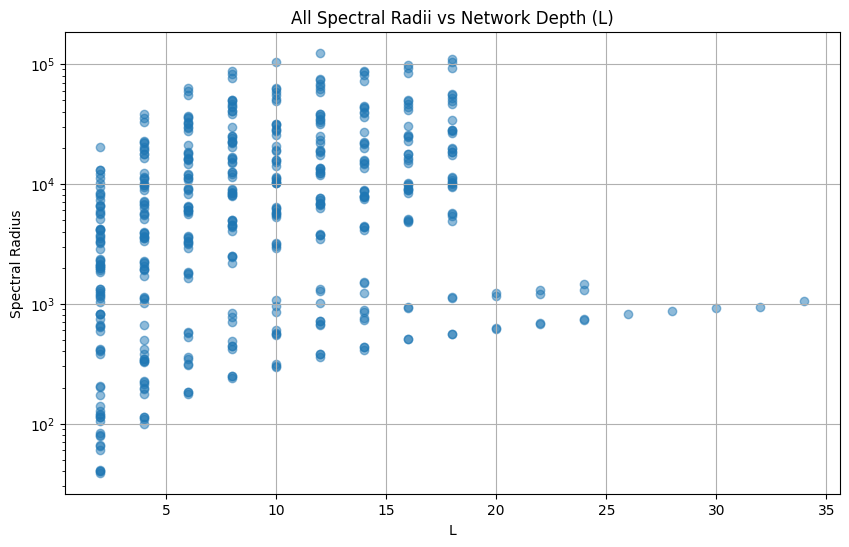

In [ ]:
# Plot all points vs L in a single plot
print("Plotting all points vs L...")
plt.figure(figsize=(10, 6))
L_values = [d['L'] for d in data]
spectral_radii = [d['mean_spectral_radius'] for d in data]
plt.scatter(L_values, spectral_radii, alpha=0.5)
plt.xlabel('L')
plt.ylabel('Spectral Radius')
plt.yscale('log')
plt.grid(True)
plt.title('All Spectral Radii vs Network Depth (L)')
plt.show()

Plotting all points vs D_IN...


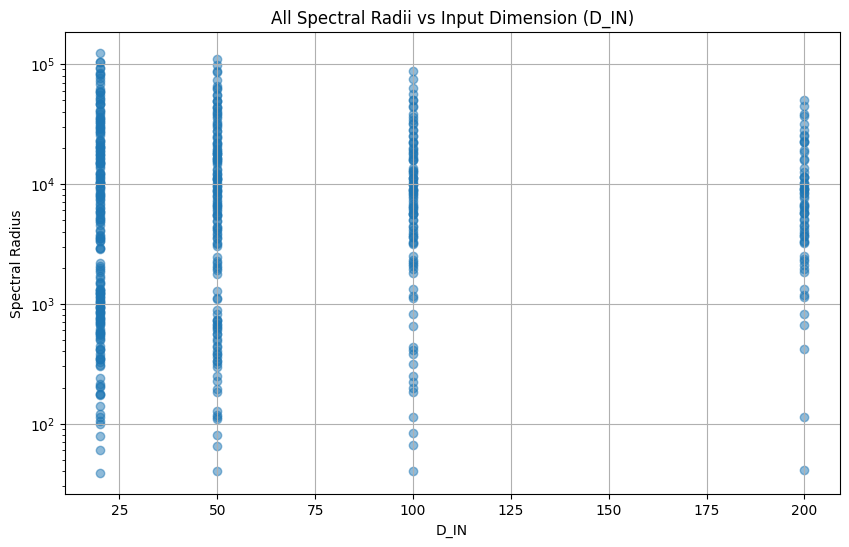

In [ ]:
# Plot all points vs D_IN in a single plot
print("Plotting all points vs D_IN...")
plt.figure(figsize=(10, 6))
D_values = [d['D_IN'] for d in data]
spectral_radii = [d['mean_spectral_radius'] for d in data]
plt.scatter(D_values, spectral_radii, alpha=0.5)
plt.xlabel('D_IN')
plt.ylabel('Spectral Radius')
plt.yscale('log')
plt.grid(True)
plt.title('All Spectral Radii vs Input Dimension (D_IN)')
plt.show()